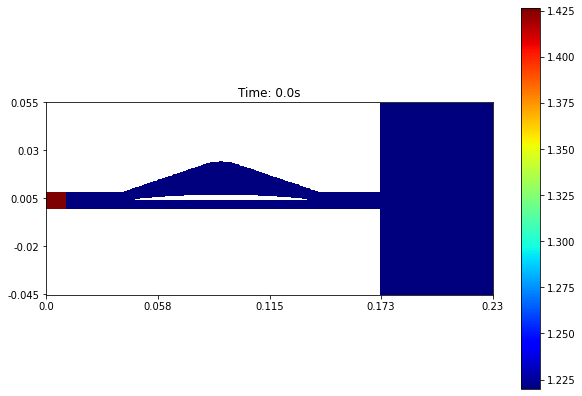

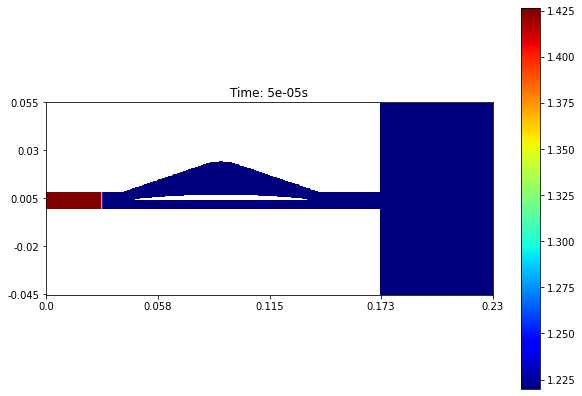

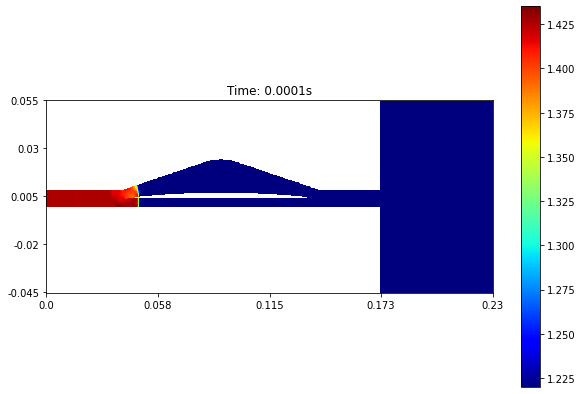

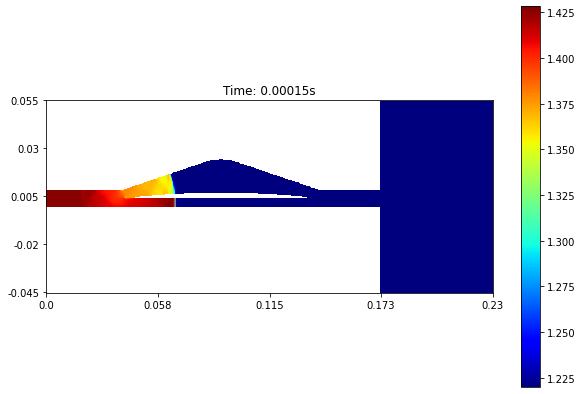

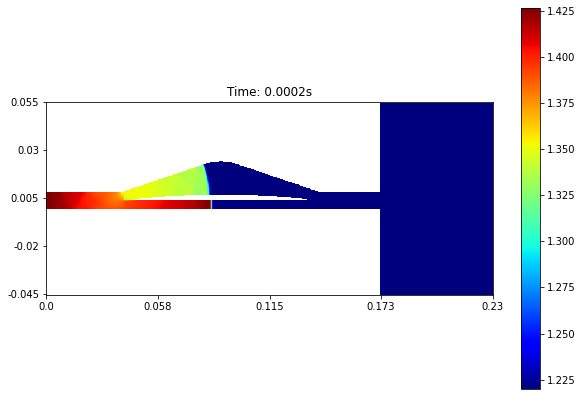

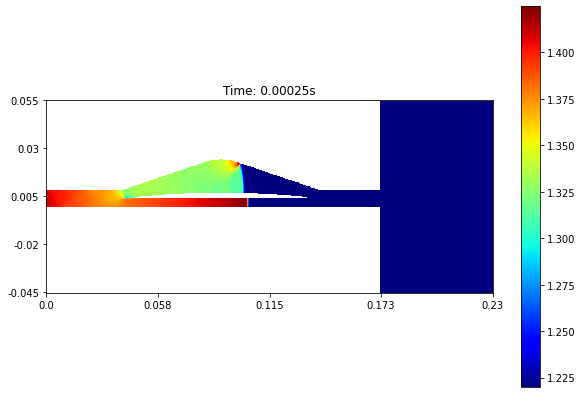

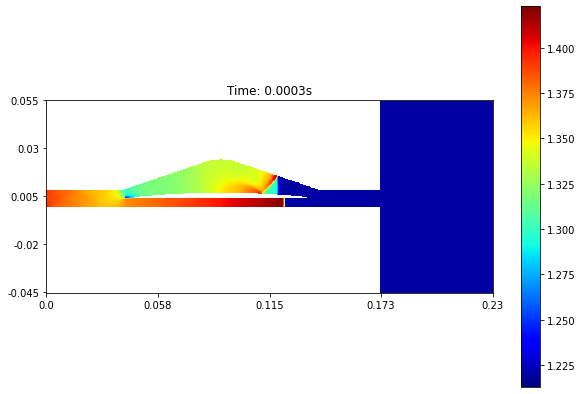

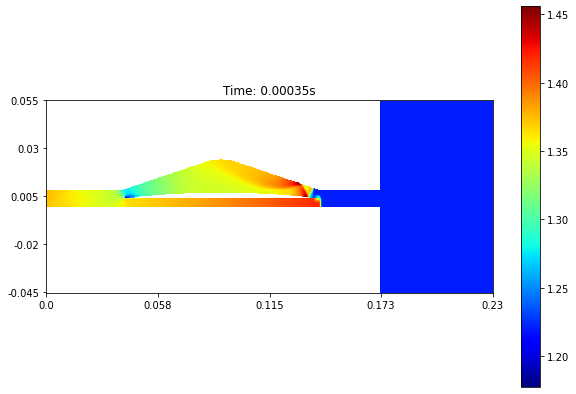

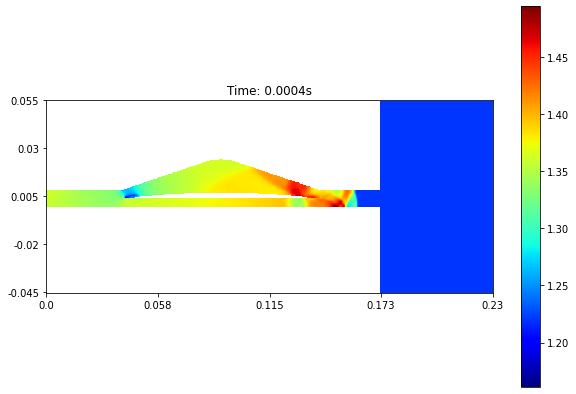

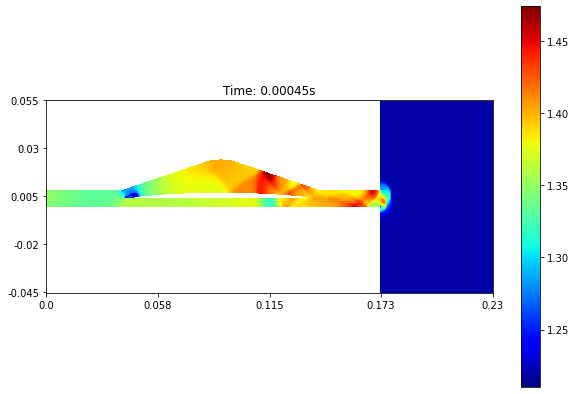

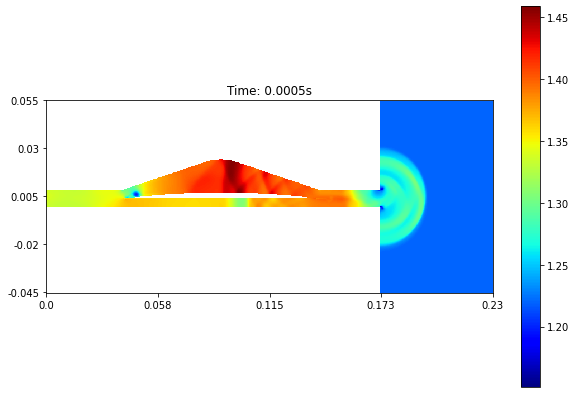

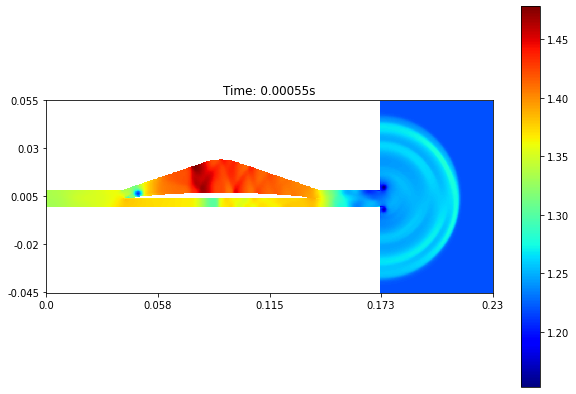

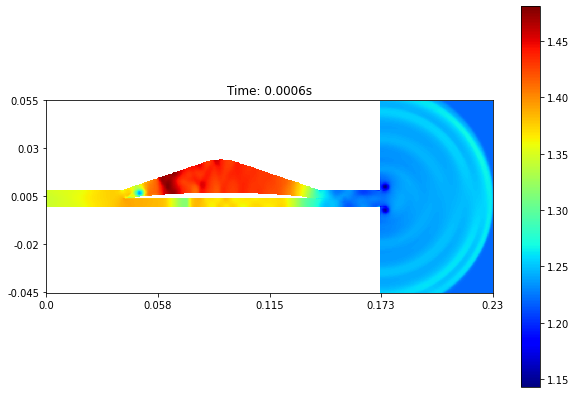

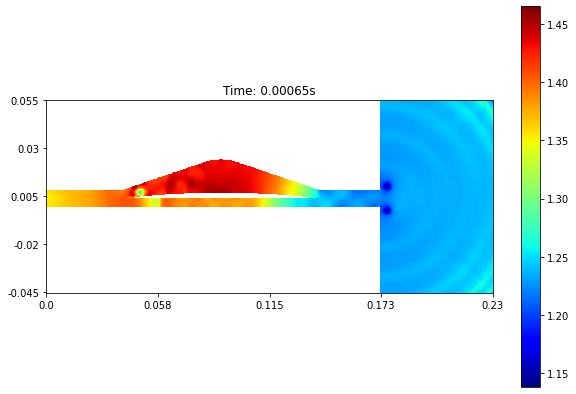

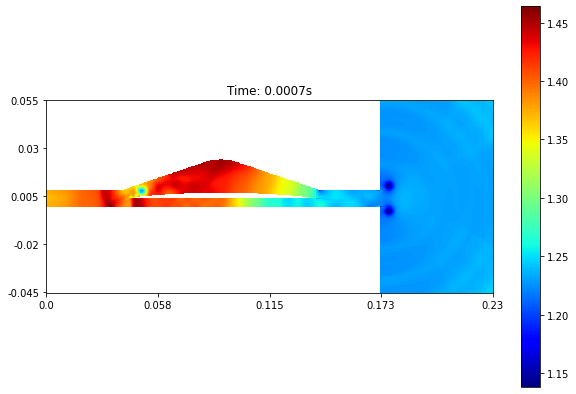

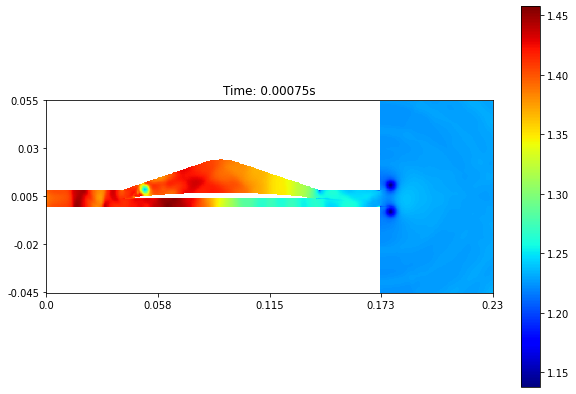

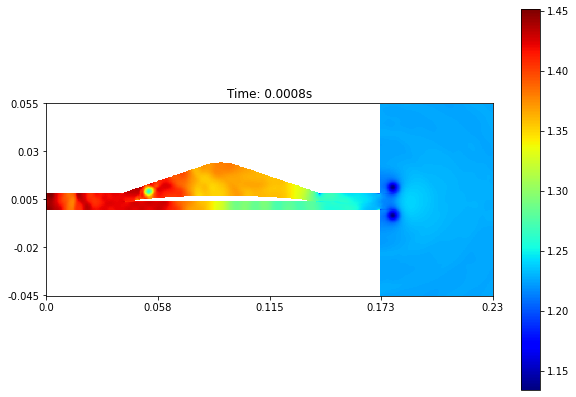

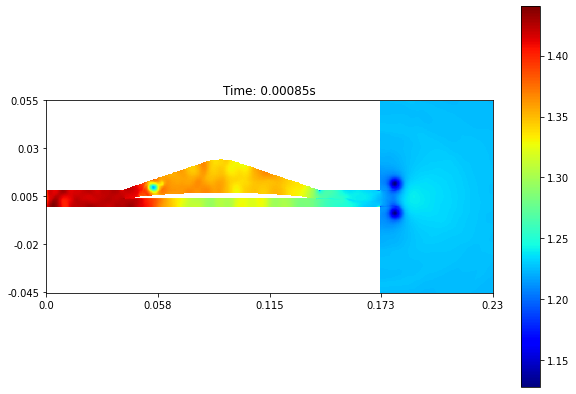

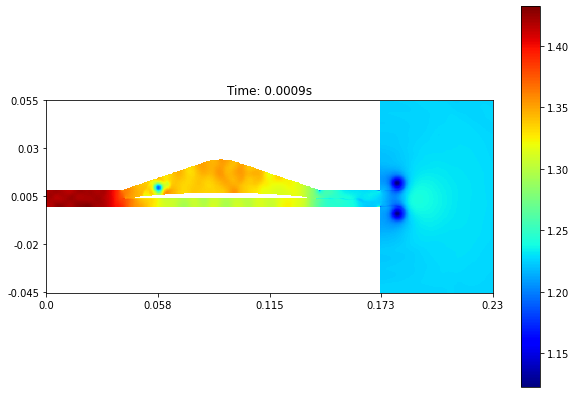

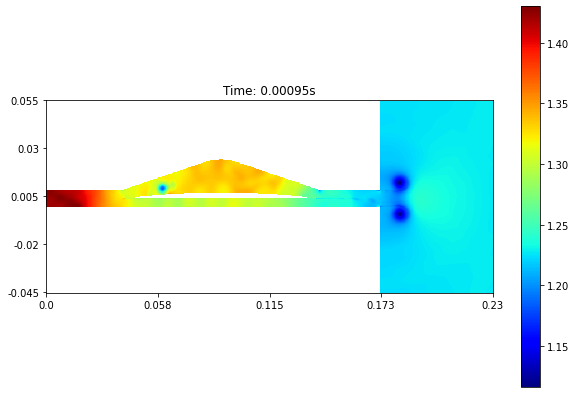

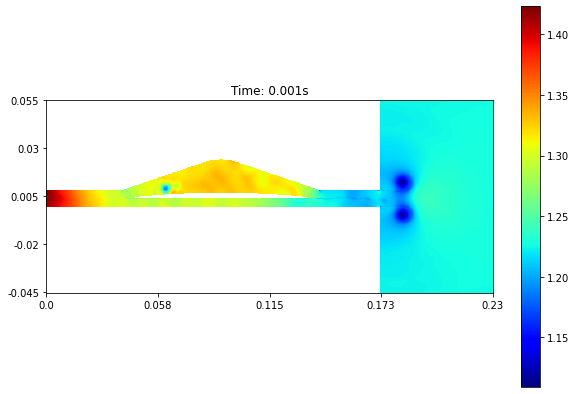

In [17]:
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],0,:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

path = '/srv/public/Divider_c24test.h5'

file = h5py.File(path, mode='r')
data = np.array(file['data'][:, 0, :, :])
alpha = np.array(file['data'][:, -1, :, :])
times = np.array(file['times'])
dx = file['data'].attrs['cell_size']
xlower = file['data'].attrs['xlower']
file.close()

nx = [data.shape[1], data.shape[2]]
xupper = xlower + dx * nx

vmin = None #0.4
vmax = None #2.0

ns = [i for i in range(data.shape[0]) if i % 5 == 0]
for n in ns:
    rho = data[n,:,:]
    nticks = 5

    real_x = np.around(np.linspace(xlower[0], xupper[0], nticks, endpoint=True), 3)
    real_y = np.around(np.linspace(xlower[1], xupper[1], nticks, endpoint=True), 3)

    dxt = [int(nx[0] / (nticks - 1)), int(nx[1] / (nticks - 1))]
    xticks = list(range(0, nx[0] + 1, dxt[0]))
    yticks = list(range(0, nx[1] + 1, dxt[1]))
    
    volfrac = alpha[n, :, :]
    imdata = np.reshape(rho, [nx[1], nx[0]])
    volfrac = np.reshape(volfrac, [nx[1], nx[0]])# np.log(1.0 + np.reshape(rho, [nx[1], nx[0]]))
    imdata = np.where(volfrac == 0.0, np.nan, imdata)
    f, ax = plt.subplots(figsize=(10, 7))
    if vmin is not None:
        im = ax.imshow(imdata, origin='lower', vmin=vmin, vmax=vmax, interpolation='none')
    else:
        im = ax.imshow(imdata, origin='lower', cmap='jet', interpolation='none')
    plt.colorbar(im)
    ax.set_xticks(xticks)
    ax.set_xticklabels(real_x)
    ax.set_yticks(yticks)
    ax.set_yticklabels(real_y)
    ax.set_title('Time: {:.3}s'.format(times[n]))
    plt.show()